# Lab #1

Members: Noam Yan,Yu Wu <br>
Section: AC <br>
Date: 10/06/2020

## 1. A little statistics

### Question 1

1B.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (7,5)

In [2]:
# get the norm distribution
d = stats.norm.rvs(loc = 5., scale = 0.01, size = 100000)

In [3]:
X = np.array([1.,2.,5.])
prob = .5*scipy.special.erfc(X/(2**.5))
# prob = stats.norm.sf(X)
prob

array([1.58655254e-01, 2.27501319e-02, 2.86651572e-07])

prob represents the the probability of 1sigma,2sigma,and 5sigma. It is controled by the sigma value - X. <br>
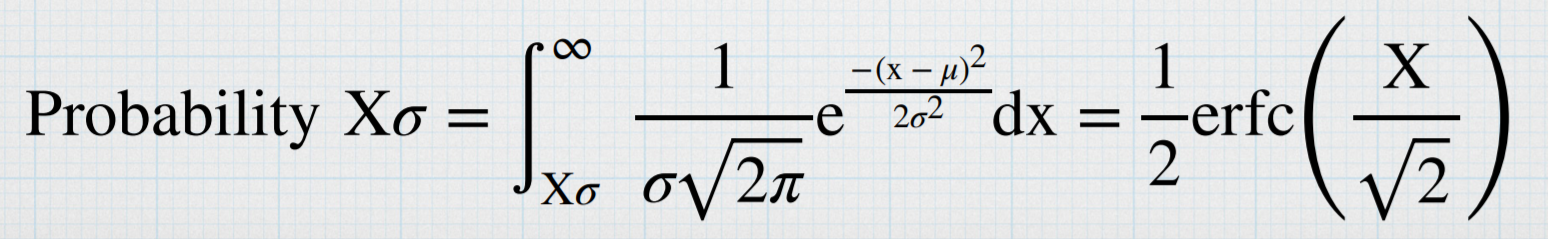
It is calculated by the fomula provided in the first lecture.but 1 - stats.norm.cdf() and sf() work too.

1C.

In [4]:
sigV = scipy.special.erfcinv(prob*2)*(2**.5)
# sigV = stats.norm.isf(prob)
sigV

array([1., 2., 5.])

sigV represents how much sigma away from the mean the observation point is .<br>
Similarly, we can calculate backwards through stats.norm.ppf() or isf()

1D. <br>
As for the question about minus sign, I assume you mean the minus sign in "1 - stats.norm.cdf()".It is because the build-in function come out with the integration from 0 to the observation point, however, what we want is the area behind. The total probability is 1, so we just do subtraction.
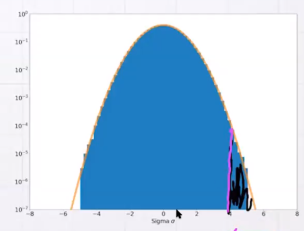

### Question 2

2A. Rayleigh 

In [5]:
loc, scale = 5.,0.01
d_r = stats.rayleigh.rvs(loc = loc, scale = scale, size = 100000)

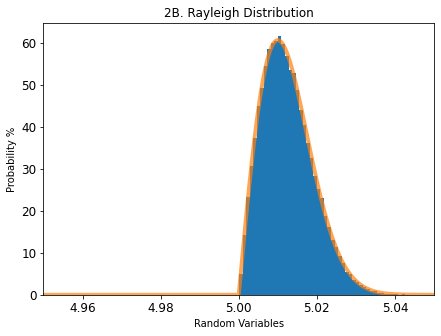

In [6]:
fig, ax = plt.subplots(1, 1)
ax.hist(d_r,50, density=True)
plt.tick_params(labelsize = 12)
plt.xlim([4.95,5.05])
x = np.linspace(4.95,5.05,1000)
ax.plot(x,stats.rayleigh.pdf(x,loc = 5., scale = 0.01),linewidth = 4,alpha = 0.7)
plt.title("2B. Rayleigh Distribution")
plt.xlabel('Random Variables')
plt.ylabel('Probability %')
plt.show()

### Question 3

3A. Assume the hypothetical measurement is 5.025


In [7]:
x_hypo =5.025

3B. My question is:  what is the the probability of signal-free data giving a measurement that is equally or more signal like than 5.025?

3C. integral of the probability distribution from 5.025 to infinity.


3D.

In [8]:
prob_hypo = 1-stats.rayleigh.cdf(x_hypo,loc, scale)
prob_hypo

0.04393693362340356

The probability is about 0.0439

In [9]:
sigV_hypo = stats.norm.isf(prob_hypo)
sigV_hypo

1.7067212947439105

The probability is equivalent to 1.7sigma with respect to normal distribution.

### Question 4

In [10]:
x_list = np.arange(5,5.04,0.002)

In [11]:
prob_list = 1-stats.rayleigh.cdf(x_list,loc, scale)

In [12]:
import pandas as pd
df = pd.DataFrame({'x':x_list, 'prob': prob_list})
df

,x,prob
0,5.000,1.000000
1,5.002,0.980199
2,5.004,0.923116
3,5.006,0.835270
4,5.008,0.726149
5,5.010,0.606531
6,5.012,0.486752
7,5.014,0.375311
8,5.016,0.278037
9,5.018,0.197899


Pattern: As the observation point leaves the loc(5.00), the possibility decreases. The decreasion grows fast before the mean and the variation speed drops after.

## 2. Non-continuous distributions

1. I choose Poisson.

1B.

In [13]:
mean = [3,5,7]
size = 100000

In [14]:
d_p = []
for i in range(len(mean)):
    d_p.append(stats.poisson.rvs(mean[i], size=size))

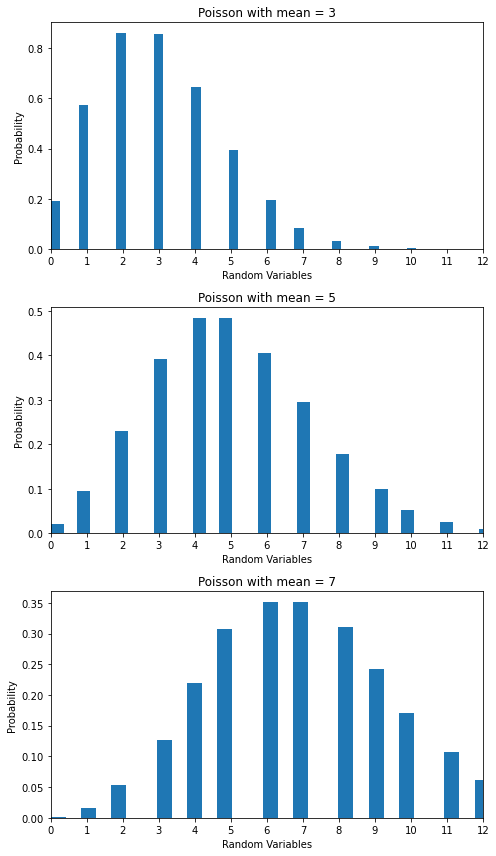

In [15]:
plt.rcParams["figure.figsize"] = (7,12)
fig, axs = plt.subplots(3)
for i in range(len(mean)):
    weights = np.ones_like(d_p[i])/float(len(d_p[i]))
    axs[i].hist(d_p[i],50, density=True, weights=weights)
#     x = np.linspace(0,12,1000)
#     axs[i].plot(x,stats.poisson.pmf(x,mean[i]),linewidth = 4,alpha = 0.7)
    axs[i].title.set_text('Poisson with mean = %s'%(mean[i]))
    axs[i].set_xlabel('Random Variables')
    axs[i].set_ylabel('Probability')
    axs[i].set_xlim([0,12])
    axs[i].set_xticks(np.arange(0, 13, step=1))
fig.tight_layout()

plt.show()

1C. My question is: What is the the probability of Poinsson distribution(mean=3) signal-free data giving a measurement that is equally or more signal like than 5 ?

In [16]:
prob_p = 1 - stats.poisson.cdf(5,mean[0])
prob_p

0.08391794203130343

The probability is about 0.08.

1D.<br>
I agree. Because the probability relies on the position of the observation point, and we only calculate the integration of the data behind. Since the data is discrete, in other word, there is no data between two x-values, the probability cannot change between two x-values. Similar to sigmas, which is the distance to the mean.

1E. <br>
As I mentioned above, the discrepancy of distribution will affect on probability and sigmas.<br>
Whereas, the mean is calculated by the total amount, which is not necessary to be perfectly divided by the number of events.For example, the mean of a set [2,3] is 2.5. But I won't say it changes continuously, because selecting the seperation line does not change the mean.